<a href="https://colab.research.google.com/github/GuiRibCarra/Busca-Gulosa-A_star/blob/main/PortoUniao_Curitiba_Buscas_Gulosa_A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grafo e Distancias Lineares ao Objetivo Curitiba

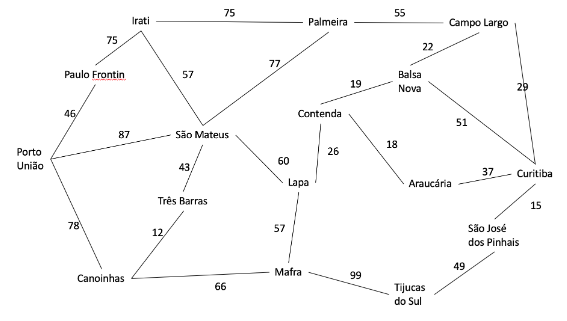
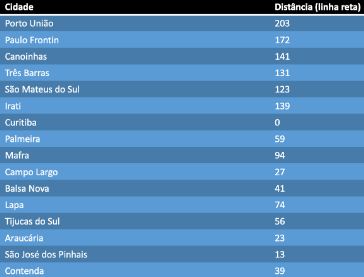

# Criação do Grafo

Vertice


In [ ]:
class Vertice:
  def __init__(self,rotulo,distancia_objetivo):
    self.rotulo = rotulo
    self.visitado = False
    self.distancia_objetivo = distancia_objetivo
    self.adjacentes = []

  def adiciona_adjacente(self,adjacente):
    self.adjacentes.append(adjacente)

  def mostra_adjacentes(self):
    for i in self.adjacentes:
      print(i.vertice.rotulo, i.custo)

Adjacente

In [ ]:
class Adjacente:
  def __init__(self,vertice,custo):
    self.vertice = vertice
    self.custo = custo
    self.distancia_aestrela = vertice.distancia_objetivo + self.custo

Grafo

In [ ]:
class Grafo:
  porto_uniao = Vertice('Porto Uniao',203)
  paulo_frontin = Vertice('Paulo Frontin',172)
  sao_mateus = Vertice('São Mateus',123)
  canoinhas = Vertice('Canoinhas',141)
  irati = Vertice('Irati',139)
  tres_barras = Vertice('Três Barras',131)
  lapa = Vertice('Lapa',74)
  mafra = Vertice('Mafra',94)
  contenda = Vertice('Contenda',39)
  palmeira = Vertice('Palmeira',59)
  balsa_nova = Vertice('Balsa Nova',41)
  campo_largo = Vertice('Campo Largo',27)
  araucaria = Vertice('Araucaria',23)
  tijucas_do_sul = Vertice('Tijucas do Sul',56)
  sao_jose_dos_pinhais = Vertice('São José dos Pinhais',13)
  curitiba = Vertice('Curitiba',0)

  porto_uniao.adiciona_adjacente(Adjacente(paulo_frontin,46))
  porto_uniao.adiciona_adjacente(Adjacente(sao_mateus,87))
  porto_uniao.adiciona_adjacente(Adjacente(canoinhas,78))

  paulo_frontin.adiciona_adjacente(Adjacente(porto_uniao,46))
  paulo_frontin.adiciona_adjacente(Adjacente(irati,75))

  sao_mateus.adiciona_adjacente(Adjacente(porto_uniao,87))
  sao_mateus.adiciona_adjacente(Adjacente(irati,57))
  sao_mateus.adiciona_adjacente(Adjacente(tres_barras,43))
  sao_mateus.adiciona_adjacente(Adjacente(lapa,60))
  sao_mateus.adiciona_adjacente(Adjacente(palmeira,77))

  canoinhas.adiciona_adjacente(Adjacente(porto_uniao,78))
  canoinhas.adiciona_adjacente(Adjacente(tres_barras,12))
  canoinhas.adiciona_adjacente(Adjacente(mafra,66))

  irati.adiciona_adjacente(Adjacente(paulo_frontin,75))
  irati.adiciona_adjacente(Adjacente(sao_mateus,57))
  irati.adiciona_adjacente(Adjacente(palmeira,75))

  tres_barras.adiciona_adjacente(Adjacente(canoinhas,12))
  tres_barras.adiciona_adjacente(Adjacente(sao_mateus,43))

  lapa.adiciona_adjacente(Adjacente(sao_mateus,60))
  lapa.adiciona_adjacente(Adjacente(contenda,26))
  lapa.adiciona_adjacente(Adjacente(mafra,57))

  mafra.adiciona_adjacente(Adjacente(canoinhas,66))
  mafra.adiciona_adjacente(Adjacente(lapa,57))
  mafra.adiciona_adjacente(Adjacente(tijucas_do_sul,99))

  contenda.adiciona_adjacente(Adjacente(lapa,26))
  contenda.adiciona_adjacente(Adjacente(araucaria,18))
  contenda.adiciona_adjacente(Adjacente(balsa_nova,19))

  palmeira.adiciona_adjacente(Adjacente(irati,75))
  palmeira.adiciona_adjacente(Adjacente(sao_mateus,77))
  palmeira.adiciona_adjacente(Adjacente(campo_largo,55))

  balsa_nova.adiciona_adjacente(Adjacente(contenda,19))
  balsa_nova.adiciona_adjacente(Adjacente(curitiba,51))
  balsa_nova.adiciona_adjacente(Adjacente(campo_largo,22))

  campo_largo.adiciona_adjacente(Adjacente(palmeira,55))
  campo_largo.adiciona_adjacente(Adjacente(balsa_nova,22))
  campo_largo.adiciona_adjacente(Adjacente(curitiba,29))

  araucaria.adiciona_adjacente(Adjacente(contenda,18))
  araucaria.adiciona_adjacente(Adjacente(curitiba,37))

  tijucas_do_sul.adiciona_adjacente(Adjacente(mafra,99))
  tijucas_do_sul.adiciona_adjacente(Adjacente(sao_jose_dos_pinhais,49))

  sao_jose_dos_pinhais.adiciona_adjacente(Adjacente(tijucas_do_sul,49))
  sao_jose_dos_pinhais.adiciona_adjacente(Adjacente(curitiba,15))

  curitiba.adiciona_adjacente(Adjacente(campo_largo,29))
  curitiba.adiciona_adjacente(Adjacente(balsa_nova,51))
  curitiba.adiciona_adjacente(Adjacente(araucaria,37))
  curitiba.adiciona_adjacente(Adjacente(sao_jose_dos_pinhais,15))


Inicialização do Grafo

In [ ]:
grafo = Grafo()

# Busca Gulosa


Usando como base a tabela de distancia linear

## Vetor Ordenado

In [ ]:
import numpy as np
class VetorOrdenadoG:
  def __init__(self,capacidade):
    self.capacidade = capacidade
    self.ultima_posicao = -1
    self.valores = np.empty(self.capacidade,dtype=object)

  def imprime(self):
    if self.ultima_posicao == -1:
      print("O vetor esta vazio")
    else:
      for i in range(self.ultima_posicao + 1):
        print(i,' -- ',self.valores[i].rotulo,' -- ',self.valores[i].distancia_objetivo)

  def insere(self,vertice):
    if self.ultima_posicao == self.capacidade - 1:
      print('Capacidade maxima atingida')
      return

    posicao = 0
    for i in range(self.ultima_posicao +1):
      posicao = i
      if self.valores[i].distancia_objetivo>vertice.distancia_objetivo:
        break
      if i == self.ultima_posicao:
        posicao = i + 1

    x = self.ultima_posicao
    while x >= posicao:
      self.valores[x+1] = self.valores[x]
      x-=1

    self.valores[posicao] = vertice
    self.ultima_posicao += 1

## Implementação

In [ ]:
class Gulosa:
  def __init__(self,objetivo):
    self.objetivo = objetivo
    self.encontrado = False

  def buscar(self,atual):
    print('---------')
    print('Atual: {}'.format(atual.rotulo))
    atual.visitado = True

    if atual == self.objetivo:
      self.encontrado = True
    else:
      vetor_ordenado = VetorOrdenadoG(len(atual.adjacentes))
      for adjacente in atual.adjacentes:
        if adjacente.vertice.visitado == False:
          adjacente.vertice.visitado == True
          vetor_ordenado.insere(adjacente.vertice)
      vetor_ordenado.imprime()

      if vetor_ordenado.valores[0] != None:
        self.buscar(vetor_ordenado.valores[0])

# Busca A* (A Estrela)

Usará como base a tabela de distancia linear e a distancia entre cidades

## Vetor Ordenado

In [ ]:
import numpy as np
class VetorOrdenadoA:
  def __init__(self,capacidade):
    self.capacidade = capacidade
    self.ultima_posicao = -1
    self.valores = np.empty(self.capacidade,dtype=object)

  def imprime(self):
    if self.ultima_posicao == -1:
      print("O vetor esta vazio")
    else:
      for i in range(self.ultima_posicao + 1):
        print(i,' -- ',self.valores[i].vertice.rotulo,' -- ',self.valores[i].custo,
              ' -- ', self.valores[i].vertice.distancia_objetivo,
              ' -- ', self.valores[i].distancia_aestrela)

  def insere(self,adjacente):
    if self.ultima_posicao == self.capacidade - 1:
      print('Capacidade maxima atingida')
      return

    posicao = 0
    for i in range(self.ultima_posicao +1):
      posicao = i
      if self.valores[i].distancia_aestrela>adjacente.distancia_aestrela:
        break
      if i == self.ultima_posicao:
        posicao = i + 1

    x = self.ultima_posicao
    while x >= posicao:
      self.valores[x+1] = self.valores[x]
      x-=1

    self.valores[posicao] = adjacente
    self.ultima_posicao += 1

## Implementação

In [ ]:
class AEstrela:
  def __init__(self,objetivo):
    self.objetivo = objetivo
    self.encontrado = False

  def buscar(self,atual):
    print('----------------')
    print('Atual:{}'.format(atual.rotulo))
    atual.visitado = True

    if atual == self.objetivo:
      self.encontrado = True
    else:
      vetor_ordenado = VetorOrdenadoA(len(atual.adjacentes))
      for adjacente in atual.adjacentes:
        if adjacente.vertice.visitado == False:
          adjacente.vertice.visitado = True
          vetor_ordenado.insere(adjacente)
      vetor_ordenado.imprime()

      if vetor_ordenado.valores[0] != None:
        self.buscar(vetor_ordenado.valores[0].vertice)

# Resultados


Gulosa

In [ ]:
gulosa = Gulosa(grafo.curitiba)
gulosa.buscar(grafo.porto_uniao)

---------
Atual: Porto Uniao
0  --  São Mateus  --  123
1  --  Canoinhas  --  141
2  --  Paulo Frontin  --  172
---------
Atual: São Mateus
0  --  Palmeira  --  59
1  --  Lapa  --  74
2  --  Três Barras  --  131
3  --  Irati  --  139
---------
Atual: Palmeira
0  --  Campo Largo  --  27
1  --  Irati  --  139
---------
Atual: Campo Largo
0  --  Curitiba  --  0
1  --  Balsa Nova  --  41
---------
Atual: Curitiba


**Para outra analise resetar a seção "Criação do Grafo"**

A*

In [ ]:
aestrela = AEstrela(grafo.curitiba)
aestrela.buscar(grafo.porto_uniao)

----------------
Atual:Porto Uniao
0  --  São Mateus  --  87  --  123  --  210
1  --  Paulo Frontin  --  46  --  172  --  218
2  --  Canoinhas  --  78  --  141  --  219
----------------
Atual:São Mateus
0  --  Lapa  --  60  --  74  --  134
1  --  Palmeira  --  77  --  59  --  136
2  --  Três Barras  --  43  --  131  --  174
3  --  Irati  --  57  --  139  --  196
----------------
Atual:Lapa
0  --  Contenda  --  26  --  39  --  65
1  --  Mafra  --  57  --  94  --  151
----------------
Atual:Contenda
0  --  Araucaria  --  18  --  23  --  41
1  --  Balsa Nova  --  19  --  41  --  60
----------------
Atual:Araucaria
0  --  Curitiba  --  37  --  0  --  37
----------------
Atual:Curitiba
